In [319]:
import numpy as np
import pandas as pd
import tensorflow
import keras
import matplotlib.pyplot as plt
from  sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [320]:
df=pd.read_csv(r'housing.csv')
print(df)
df=df.fillna(0)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

              0         1         2         3         4         5         6  \
0     -1.327835  1.052548  0.982143 -0.804819 -0.954593 -0.974429 -0.977033   
1     -1.322844  1.043185 -0.607019  2.045890  1.356913  0.861439  1.669961   
2     -1.332827  1.038503  1.856182 -0.535746 -0.810272 -0.820777 -0.843637   
3     -1.337818  1.038503  1.856182 -0.624215 -0.703806 -0.766028 -0.733781   
4     -1.337818  1.038503  1.856182 -0.462404 -0.597339 -0.759847 -0.629157   
...         ...       ...       ...       ...       ...       ...       ...   
20635 -0.758826  1.801647 -0.289187 -0.444985 -0.374942 -0.512592 -0.443449   
20636 -0.818722  1.806329 -0.845393 -0.888704 -0.904909 -0.944405 -1.008420   
20637 -0.823713  1.778237 -0.924851 -0.174995 -0.112325 -0.369537 -0.174042   
20638 -0.873626  1.778237 -0.845393 -0.355600 -0.292135 -0.604429 -0.393753   
20639 -0.833696  1.750146 -1.004309  0.068408  0.197611 -0.033977  0.079672   

              7         8         9  
0      2.3447

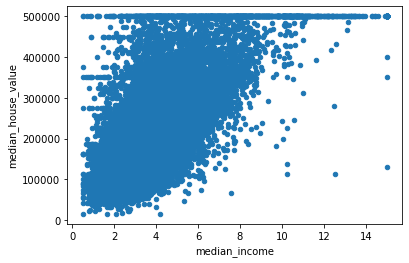

In [321]:
df.plot.scatter("median_income","median_house_value")
df['ocean_proximity'].replace({"INLAND":-1,"NEAR BAY":-0.5,"<1H OCEAN":0,"NEAR OCEAN":0.5,"ISLAND":1
},inplace=True)
x = df.values #returns a numpy array
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
print(df)

In [322]:
df1=df.loc[:,0:7:1]
df2=df[9]
df3=df[8]
x_train, x_test, y_train, y_test = train_test_split(pd.concat((df1,df2),axis=1),df3,test_size = 0.2)
print(x_train)

              0         1         2         3         4         5         6  \
16731 -0.459348 -0.131964 -0.924851  0.186672  0.178683  0.027837  0.118906   
17006 -1.352792  0.893365  0.664310 -0.753938 -0.833931 -0.849918 -0.843637   
2878   0.299331 -0.117918  1.061601 -0.665011 -0.412797 -0.342163 -0.524533   
9724  -1.078270  0.574998 -0.050812 -0.829114 -0.838663 -0.637985 -0.929952   
2908   0.264392 -0.122600  1.220517 -0.466529 -0.526361 -0.669775 -0.521917   
...         ...       ...       ...       ...       ...       ...       ...   
15704 -1.427661  1.010411  1.856182  0.267348  1.032782 -0.241494  0.864354   
18253 -1.257957  0.823137  0.425936 -0.516952 -0.117057 -0.575289 -0.147886   
7518   0.658705 -0.806152  0.505394 -0.530245 -0.616267 -0.408392 -0.542842   
17755 -1.118200  0.804409 -0.050812  0.385612  0.327737  1.381557  0.388314   
14300  1.212740 -1.367976  0.267020 -0.878619 -0.665951 -0.469322 -0.762553   

              7         9  
16731 -0.371923  0.5798

In [323]:
model = LinearRegression()
x_train=np.array(x_train).reshape(-1,9)
x_test=np.array(x_test).reshape(-1,9)
y_test=np.array(y_test).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(model.coef_)
print(model.score(x_test,y_test))
print(pred)
print(y_test)

[[-0.53014525 -0.53388184  0.12848679 -0.0892323   0.19429091 -0.40225085
   0.34239812  0.64037839  0.13044692]]
0.6539404923159027
[[ 0.29109369]
 [-0.41990683]
 [-1.42621132]
 ...
 [ 0.44307317]
 [ 0.27796099]
 [ 0.00167724]]
[[-0.1192086 ]
 [-1.17473354]
 [-1.10540514]
 ...
 [-0.19113682]
 [ 0.04544636]
 [-0.83329116]]


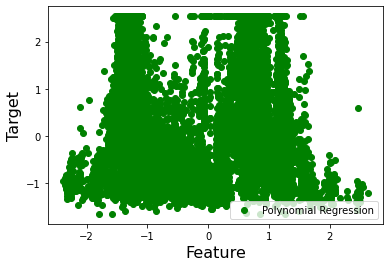

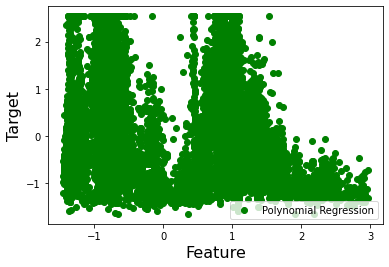

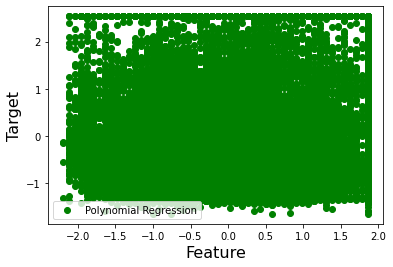

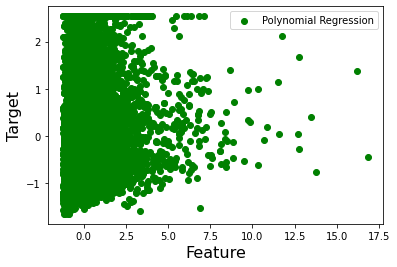

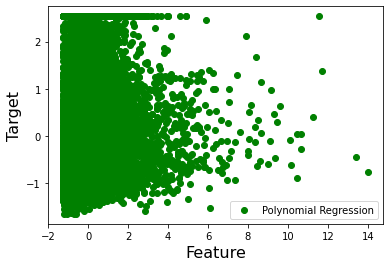

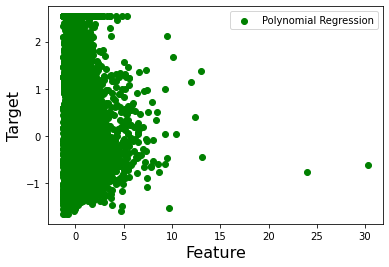

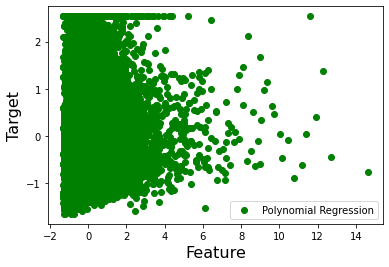

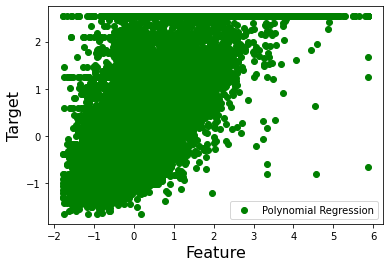

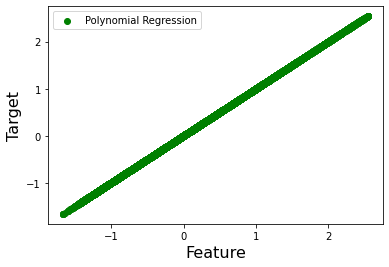

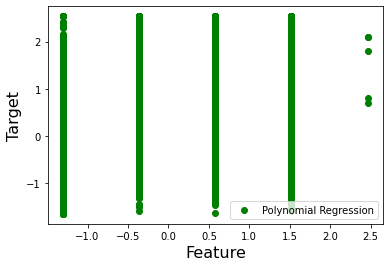

In [325]:
for i in range(10):
    plt.scatter(np.array(df[i]),np.array(df[8]),color='g',label='Polynomial Regression')
    plt.xlabel('Feature',fontsize=16)
    plt.ylabel('Target',fontsize=16)
    plt.legend()
    plt.show()